In [2]:
import tensorflow_io as tfio
from google.cloud import storage
import tensorflow as tf
import matplotlib.pyplot as plt

In [49]:
storage_client = storage.Client()
file_list = []
prefix_list = ['00m', '12m', '18m', '24m', '30m', '36m', '48m', '72m', '96m']

for item in prefix_list:
    print('loading ' + item)
    prefix = 'data/' + str(item)
    blobs = storage_client.list_blobs('oai-challenge-dataset', prefix=prefix)

    for blob in blobs:
        file_name = 'gs://oai-challenge-dataset/' + str(blob.name)
        file_list.append(file_name)
    
    print(len(file_list))

print(len(file_list))

loading 00m
1494937
loading 12m
2803577
loading 18m
2849657
loading 24m
4054137
loading 30m
4132057
loading 36m
5027897
loading 48m
6105726
loading 72m
6986366
loading 96m
7786206
7786206


In [17]:
with open("dicom_files.txt", "w") as output:
    for idx, item in enumerate(file_list):
        if idx % 10000 == 0:
            print('{} out of {}'.format(idx+1, len(file_list)))
        output.write('{}\n'.format(item))

1 out of 7786206
10001 out of 7786206
20001 out of 7786206
30001 out of 7786206
40001 out of 7786206
50001 out of 7786206
60001 out of 7786206
70001 out of 7786206
80001 out of 7786206
90001 out of 7786206
100001 out of 7786206
110001 out of 7786206
120001 out of 7786206
130001 out of 7786206
140001 out of 7786206
150001 out of 7786206
160001 out of 7786206
170001 out of 7786206
180001 out of 7786206
190001 out of 7786206
200001 out of 7786206
210001 out of 7786206
220001 out of 7786206
230001 out of 7786206
240001 out of 7786206
250001 out of 7786206
260001 out of 7786206
270001 out of 7786206
280001 out of 7786206
290001 out of 7786206
300001 out of 7786206
310001 out of 7786206
320001 out of 7786206
330001 out of 7786206
340001 out of 7786206
350001 out of 7786206
360001 out of 7786206
370001 out of 7786206
380001 out of 7786206
390001 out of 7786206
400001 out of 7786206
410001 out of 7786206
420001 out of 7786206
430001 out of 7786206
440001 out of 7786206
450001 out of 7786206
46

3670001 out of 7786206
3680001 out of 7786206
3690001 out of 7786206
3700001 out of 7786206
3710001 out of 7786206
3720001 out of 7786206
3730001 out of 7786206
3740001 out of 7786206
3750001 out of 7786206
3760001 out of 7786206
3770001 out of 7786206
3780001 out of 7786206
3790001 out of 7786206
3800001 out of 7786206
3810001 out of 7786206
3820001 out of 7786206
3830001 out of 7786206
3840001 out of 7786206
3850001 out of 7786206
3860001 out of 7786206
3870001 out of 7786206
3880001 out of 7786206
3890001 out of 7786206
3900001 out of 7786206
3910001 out of 7786206
3920001 out of 7786206
3930001 out of 7786206
3940001 out of 7786206
3950001 out of 7786206
3960001 out of 7786206
3970001 out of 7786206
3980001 out of 7786206
3990001 out of 7786206
4000001 out of 7786206
4010001 out of 7786206
4020001 out of 7786206
4030001 out of 7786206
4040001 out of 7786206
4050001 out of 7786206
4060001 out of 7786206
4070001 out of 7786206
4080001 out of 7786206
4090001 out of 7786206
4100001 out

7280001 out of 7786206
7290001 out of 7786206
7300001 out of 7786206
7310001 out of 7786206
7320001 out of 7786206
7330001 out of 7786206
7340001 out of 7786206
7350001 out of 7786206
7360001 out of 7786206
7370001 out of 7786206
7380001 out of 7786206
7390001 out of 7786206
7400001 out of 7786206
7410001 out of 7786206
7420001 out of 7786206
7430001 out of 7786206
7440001 out of 7786206
7450001 out of 7786206
7460001 out of 7786206
7470001 out of 7786206
7480001 out of 7786206
7490001 out of 7786206
7500001 out of 7786206
7510001 out of 7786206
7520001 out of 7786206
7530001 out of 7786206
7540001 out of 7786206
7550001 out of 7786206
7560001 out of 7786206
7570001 out of 7786206
7580001 out of 7786206
7590001 out of 7786206
7600001 out of 7786206
7610001 out of 7786206
7620001 out of 7786206
7630001 out of 7786206
7640001 out of 7786206
7650001 out of 7786206
7660001 out of 7786206
7670001 out of 7786206
7680001 out of 7786206
7690001 out of 7786206
7700001 out of 7786206
7710001 out

In [45]:
text_file = open("dicom_files.txt", "r")
lines = text_file.readlines()
files = []
for file in lines:
    line = file[:-1]
    files.append(line)

print(files[0:3])

['gs://oai-challenge-dataset/data/00m/0.C.2/9000296/20040909/10693706/001.dcm', 'gs://oai-challenge-dataset/data/00m/0.C.2/9000296/20040909/10693706/002.dcm', 'gs://oai-challenge-dataset/data/00m/0.C.2/9000296/20040909/10693706/003.dcm']


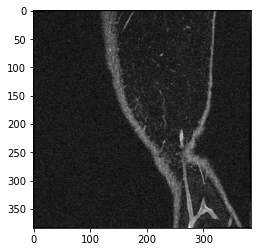

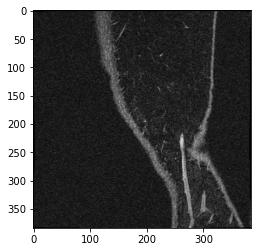

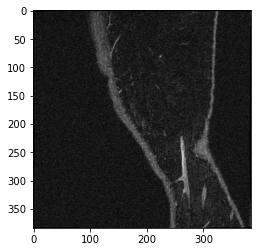

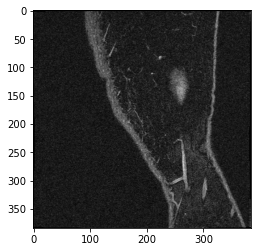

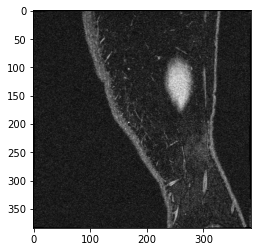

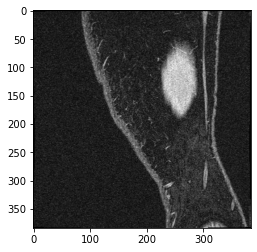

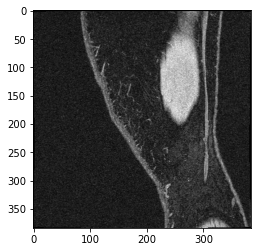

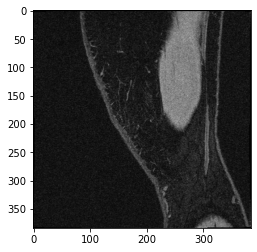

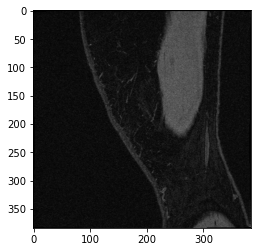

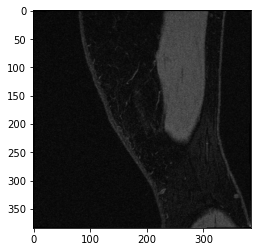

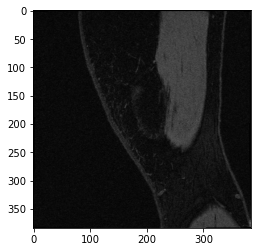

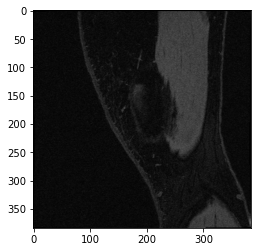

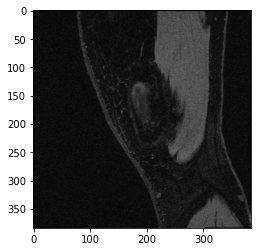

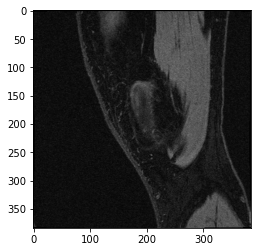

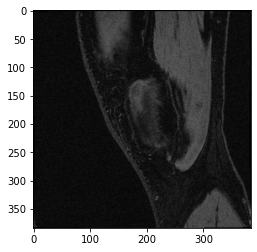

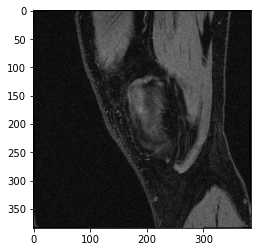

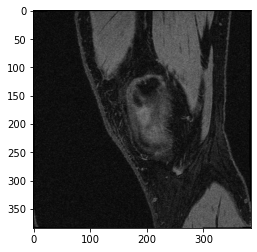

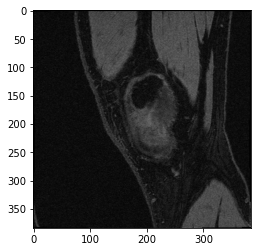

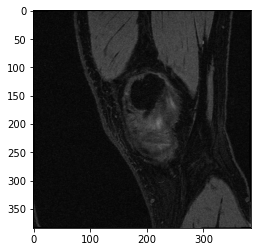

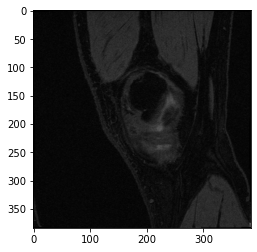

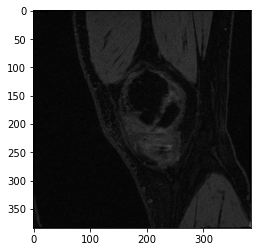

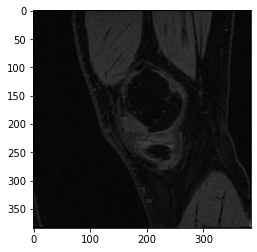

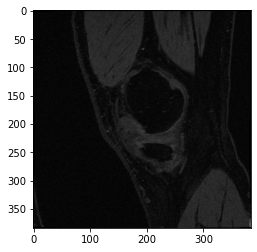

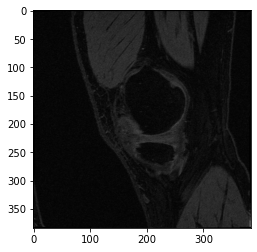

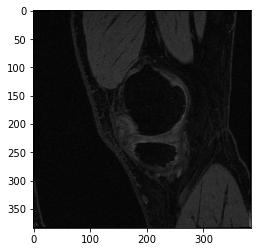

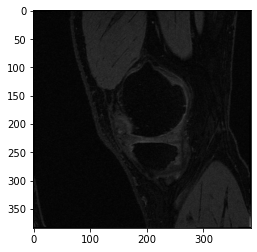

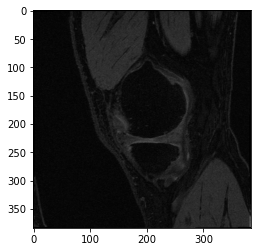

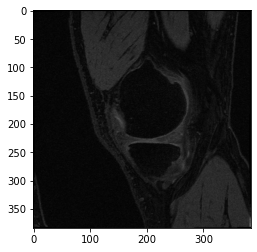

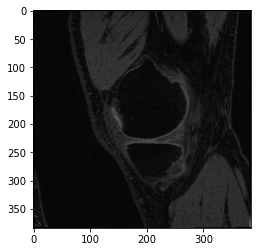

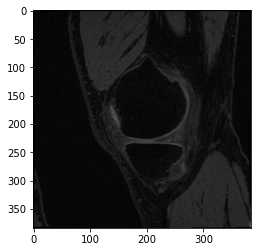

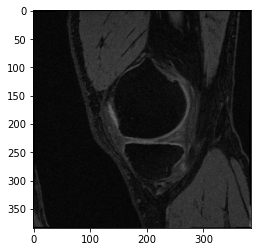

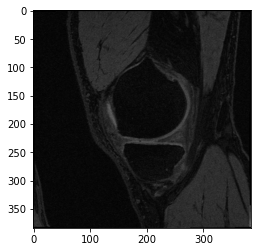

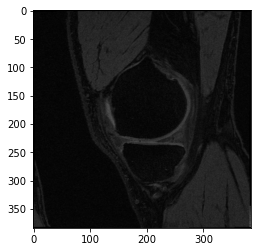

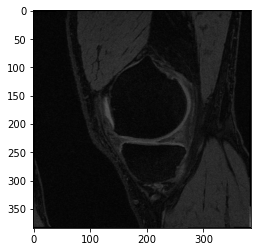

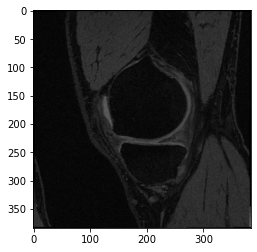

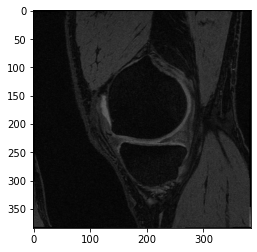

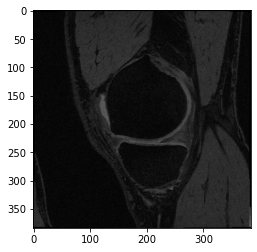

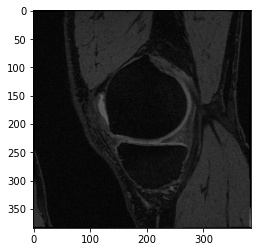

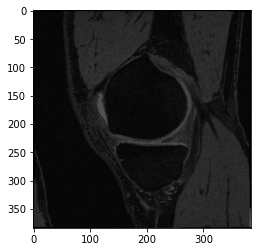

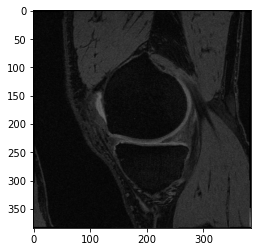

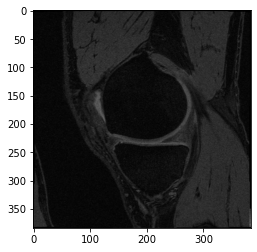

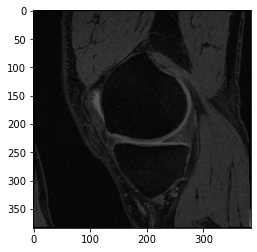

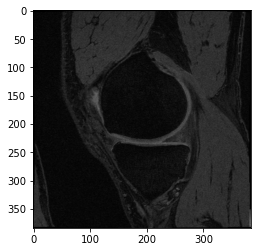

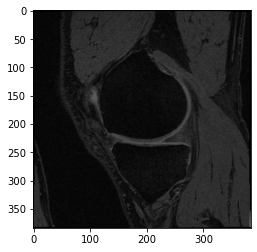

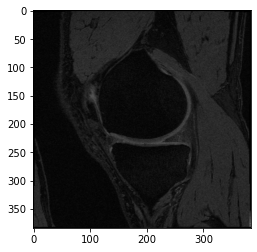

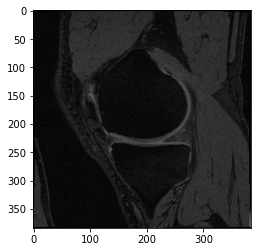

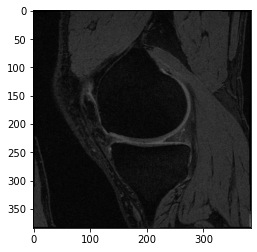

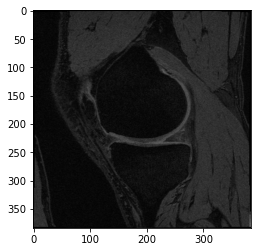

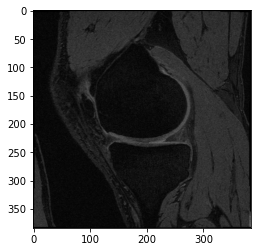

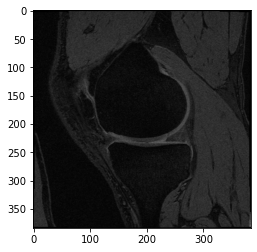

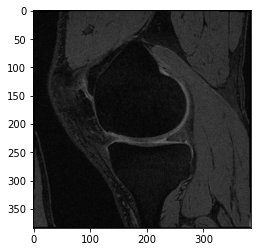

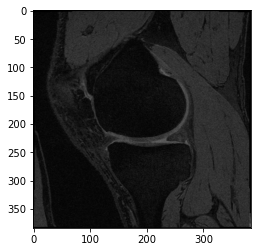

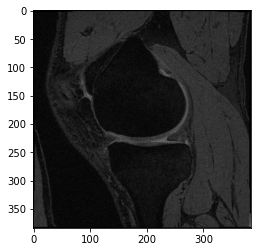

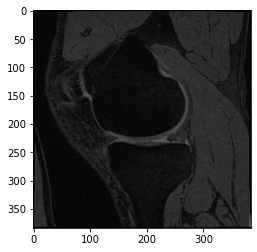

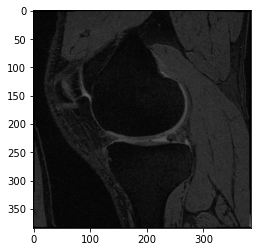

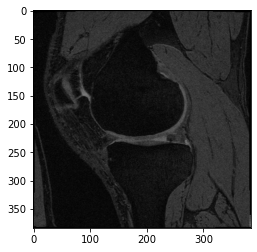

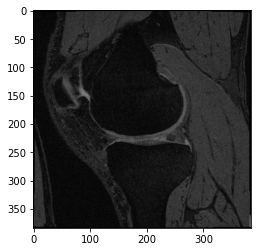

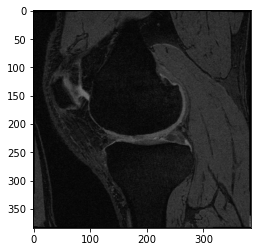

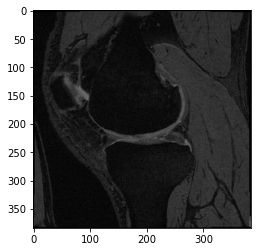

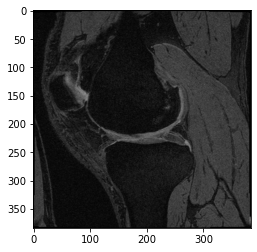

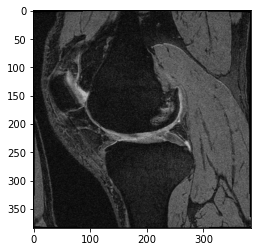

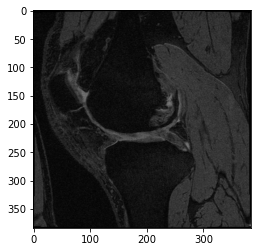

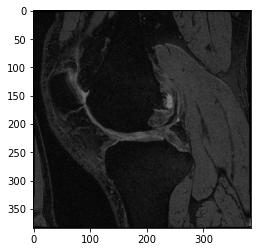

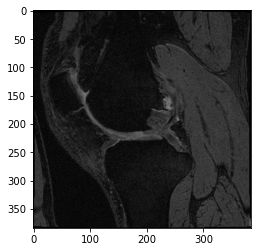

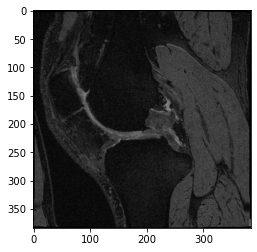

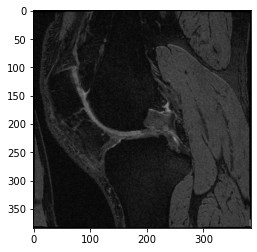

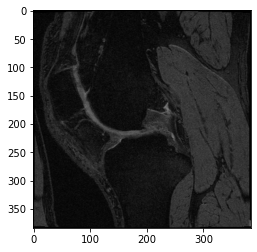

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [10]:
for i in range(len(lines)):
    image_bytes = tf.io.read_file(lines[i][1:].strip("'"))
    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)
    image = tf.cast(image, tf.float32)
    image = (image - tf.math.reduce_min(image)) / (tf.math.reduce_max(image) - tf.math.reduce_min(image))

    plt.imshow(image[0, :, :, 0], cmap='gray')
    plt.show()

Tensor("args_0:0", shape=(), dtype=string)
(384, 384, 1)


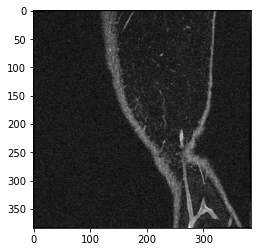

In [48]:
def read_dicom_file(line):
    image_bytes = tf.io.read_file(line)
    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)
    image = tf.cast(image, tf.float32)
    image = image[0, ...]
    
    return image

dataset = tf.data.Dataset.from_tensor_slices(files)
dataset = dataset.batch(batch_size=32)
dataset = dataset.map(read_dicom_file)

for ele in dataset:
    print(ele.shape)
#     plt.imshow(ele, cmap='gray')
#     plt.show()
    break